# Machine Learning for Diabetes Classification

#### In this notebook we will cover several topics in a machine learning workflow, including:

-  Reading in and inspecting data

- Dealing with missing values

- Quick exploratory analysis

- Model building

-  Model evaluation

-  Model selection

-  Improvements


## Introduction
<br>
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skinfold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index (weight in kg/(height in m)^2).
7. Diabetes pedigree function.
8. Age (years).
9. Class variable (0 or 1).

Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Read in our data and inspect.

In [2]:
df = pd.read_csv('D:/Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing

We need to examine our data set and make some initial preprocessing steps before we continue. We may perform more processing steps later, especially if there are any issues revealed during our exploratory analysis.

Take a look at some basic information.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Check for null values.

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It looks like we have a clean data set with no missing values.

Next, we check for duplicated rows.

In [5]:
df.duplicated().sum()

0

Very nice!

Let's get some quick summary statistics.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


While we previously concluded we had no null values, we can see that there are multiple attributes with minimum values of _*0*_ that violate common sense. For instance, how can an individual have a value of _*0*_ for **BloodPressure**, **Insulin**, or **BMI**? We can conclude that values of _*0*_ are being used as a notation for missing values. **Pregnancies** is excluded from this assumption because it is not unreasonable to have a value of _*0*_ in this attribute.

The full list of columns we presume to be using _*0*_ for missing values is:
-  **Glucose**
-  **BloodPressure**
-  **SkinThickness**
-  **Insulin**
-  **BMI**

Let's see how many null values we have in each of these columns

In [7]:
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Quite a lot. Almost half of our observations have at least one missing value. If we drop the observations with null values, we lose a sizeable amount of data for model building. Instead, we can impute some values.

Let's replace the relevant _*0*_ values with _*NaN*_ values.

In [8]:
df.iloc[:, 1:6] = df.iloc[:, 1:6].replace(0, np.NaN)
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].isnull()).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


We have verified that our data frame has _*NaN*_ values where there used to be _*0*_'s. <br>
<br>
Note: This means that when we previously used df.describe, it was using the _*0*_'s in calculating the summary statistics.
<br>
Here are the corrected summary statistics.

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Imputation

Let's use scikit-learn's Imputer class to impute the median values in our data set.

In [10]:
from sklearn.preprocessing import Imputer

In [11]:
imputer_median = Imputer(strategy='median', axis=0)

Imputer only works on numerical columns, so we need to extract them. We then fit the imputer and print the results.

In [12]:
null_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_set_to_impute = df[null_columns] #create data frame of numerical columns to be imputed
imputer_median.fit(df_set_to_impute)
print('The median values are:', imputer_median.statistics_)

The median values are: [117.   72.   29.  125.   32.3]


First, we apply the computed values using the transform method. The result is an array, so we convert the array to a data frame. <br>
Then, we create **df_imputed** from **df**, followed by replacing the columns containing _NaNs_ with our columns created from Imputer.

In [13]:
X_imputed_medians = imputer_median.transform(df_set_to_impute)
df_num_imputed_median = pd.DataFrame(X_imputed_medians, index=df.index, columns=df_set_to_impute.columns)
df_imputed = df.copy()
df_imputed[null_columns] = df_num_imputed_median[null_columns]

In [14]:
df.head() #see the NaNs in SkinThickness and Insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
df_imputed.head() #No more NaNs

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
df.isnull().sum() #pre-imputed total NaNs

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
df_imputed.isnull().sum() #No more NaNs

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We have successfully replaced our missing values!

## Exploratory Data Analysis

We are going to explore the **df** data frame, not the **df_imputed** set. This is because our median imputations undoubtedly biased our distributions and relationships by squeezing them towards the middle. We want to look at how the "natural" relationships looked, ignoring the observations that we imputed. We will simply resume using the **df_imputed** set for our machine learning purposes later.

### Histograms

We start by viewing the univariate distributions of our attributes.

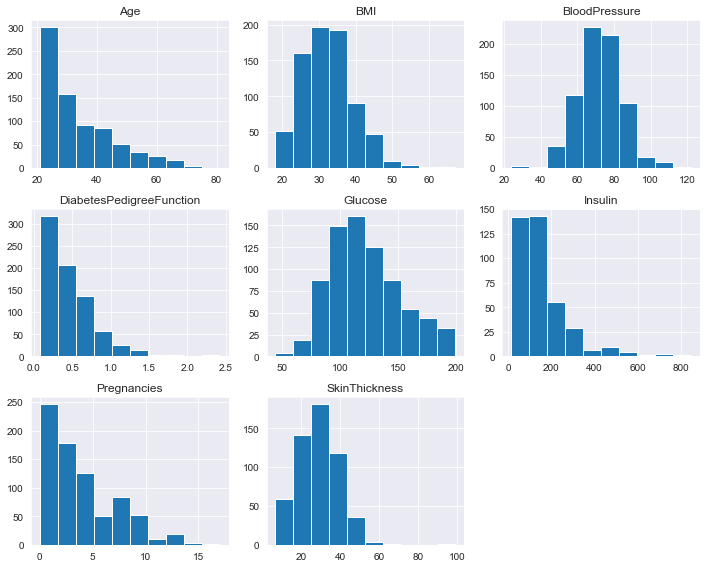

In [18]:
sns.set_style('darkgrid')
features=df.columns.drop('Outcome')
df[features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Note that many of our feature distributions skewed and on different scales. We may want to experiment with standardization techniques, as many machine learning models may perform better on scaled features.

### Pairplot

A pairplot lets us view scatterplots of our features relationships, along with each variable's distribution plotted on the diagonal. Here, we break each feature's distribution by the **Outcome** variable, with orange representing instances where **Outcome** = 1 (has diabetes).

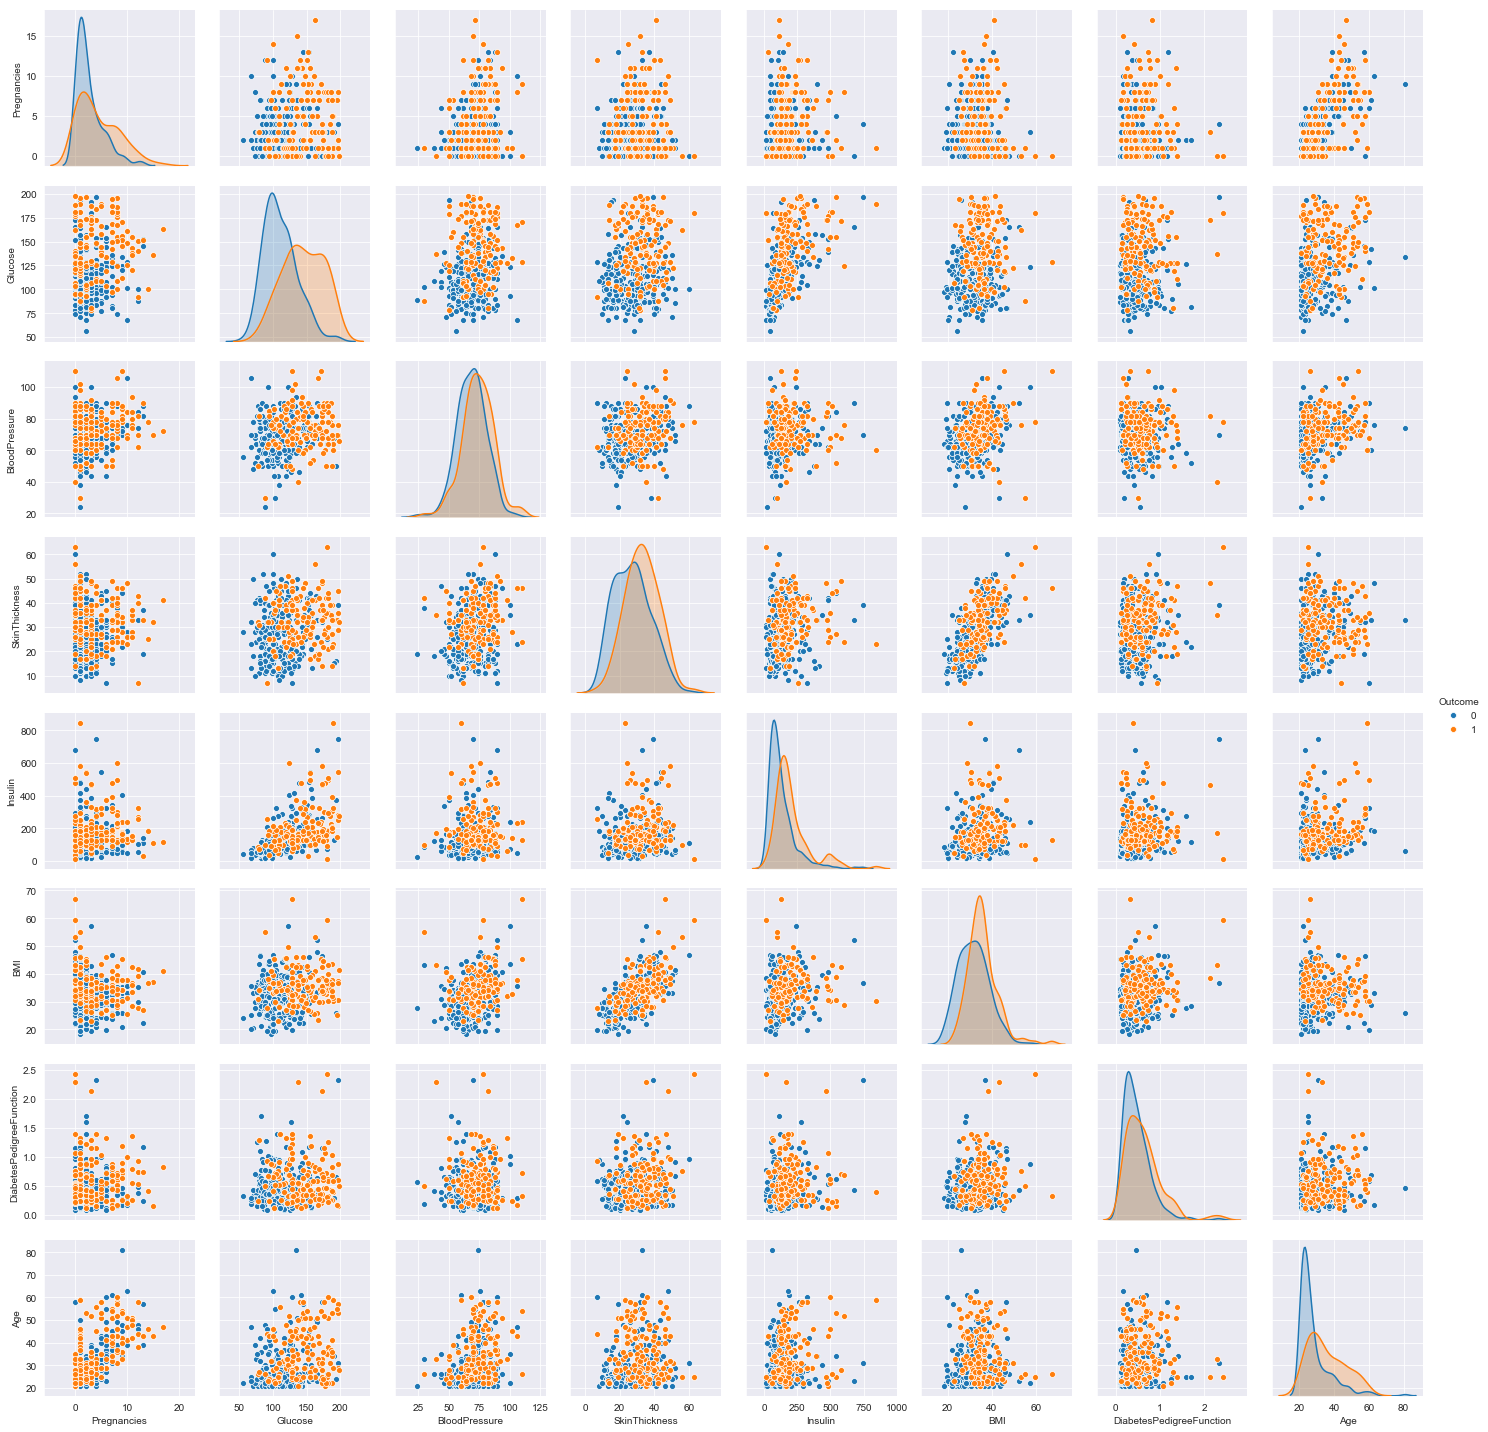

In [19]:
sns.set_style(None)
sns.pairplot(df.dropna(), vars=features, hue='Outcome')
plt.show()

We can make a few interesting observations from this plot. 
1. On the diagonal we can see how the distributions change with our class variable. While none of the features appear to create a high distinction of the classes, **Glucose** seems to create the largest separation. This is not surprising because those with diabetes battle high blood sugar due to a lack of sufficient insulin. Converseley, **BloodPressure** appears to be the weakest indicator of diabetes at first glance, though it may be useful in conjunction with our other features.


2. We can see some correlation between **Insulin/Glucose**, **BMI/SkinThickness**, and **Age/Pregnancies**. Depending on our model we may need to pay special care to these relationships.

### Heatmap

<br>
While the pairplot gives us a nice visualization, it can be difficult to quantify the relationships. Therefore, we will plot a heatmap to quickly see the correlation values.

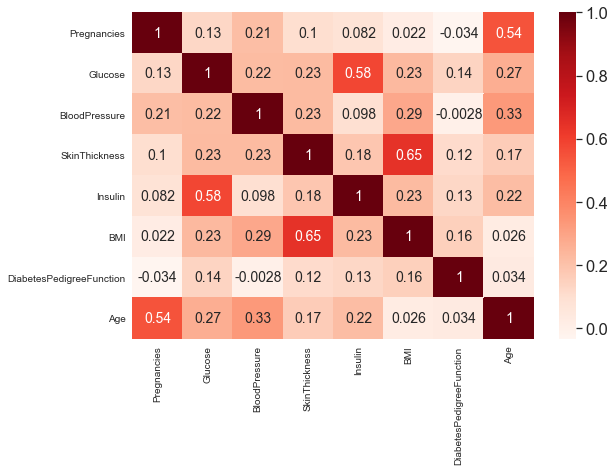

In [20]:
corr = df[features].corr()
plt.subplots(figsize=(9,6))
sns.set_context("notebook", font_scale=1.5)
sns.heatmap(corr.dropna(), annot=True, cmap='Reds', annot_kws={'size': 14})
plt.show()

Looks good. The previously mentioned relationships indeed have the strongest correlations.

## Model Building

We first split our data into a feature matrix and target vector, which is the standard for scikit-learn modeling.

In [21]:
X = df_imputed.iloc[:, 0:8] #iloc not inclusive on end index
y = df_imputed.iloc[:, -1]

It is imperative to understand how a model's results will be used in the real world. One of the biggest decisions that should be made early on is are we seeking model interpretability or model prediction. Some models can be used to draw information on the nature between the input features and the target. Other models have very little interpretation, but perform especially well at making predictions. Knowing your overall purpose is key to selecting the right model for your needs.

For our purposes, we want to maximize prediction over interpretability.

### Performance Metrics

Accuracy is the first performance metric that comes to mind when we think of predicting classifications. It is simply the number of correct predictions made by the model over all predictions made. However, accuracy alone is not a robust performance metric when the target variable has unbalanced classes. Consider a fraud detection problem, where 1% of responses are fraud and 99% are normal transactions. A simple model predicting no fraud for every case would achieve 99% accuracy, yet this is clearly a bad model for fraud detection. We therefore consult additional metrics alongside accuracy for evaluating the performance of our models.

#### F1 Score
The F1 score is a combination of two separate scores: precision and recall. Precision is a measure that tells us what proportion of patients that we diagnosed as having diabetes, actually had diabetes. Recall is a measure that tells us what proportion of patients that actually had diabetes was diagnosed by the model as having diabetes.

Recall gives us information about a classifier’s performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives (how many did we catch). It is convenient to combine these measures into a single score that summarizes the balance between the two, which gives us the F1 score.

The F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

#### Area Under the ROC Curve
The ROC curve plots the true positive rate (recall) against the false positive rate as the classification threshold changes. We quantify a model's ROC curve by taking the Area Under the Curve (AUC). 

The metric falls between 0 and 1 based on the blend between precision and recall, with a higher number indicating better classification performance. For reference, a random classifier achieves a score of 0.5. 

For a more in-depth look at these and other common classification performance metrics see: <br>
[Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c) <br>
[Classification: ROC and AUC (Google)](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) <br>
[Performance Metrics for Classification Problems in Machine Learning](https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) <br>
[ROC Curves and Area Under the Curve (AUC) Explained (Video)](https://www.youtube.com/watch?v=OAl6eAyP-yo)

### Feature Scaling

As mentioned previously, many machine learning models perform better when the numerical features are on similar scales. Scaled features can sometimes improve performance, training time, or both. We currently have attributes such as **Age** with ranges from 20 to 80, **Pregnancies** from 0 to 15, and **Insulin** values from 15 to 500+ in some cases. 

There are multiple options when it comes to scaling. Min-max Scaling (also called normalization) and Standardization are some of the most popular. However, they can be influenced by outliers. We can see in our distributions from earlier that **SkinThickness** and **Insulin** for example have a few very high values. But we do not want to delete this data as our data set is already rather small, and we don't have a strong reason for its deletion. Rather, we can use the RobustScaler function in scikit-learn, which scales our features based on percentiles and is therefore not influenced by a few number of large marginal outliers.

We first split our data into a feature matrix and target vector, which is the standard for scikit-learn modeling.

In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
transformer = RobustScaler().fit(X)
X_scaled = transformer.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,0.857143,0.000000,0.142857,0.665359,1.235294
1,-0.4,-0.790123,-0.375,0.000000,0.000000,-0.626374,-0.056209,0.117647
2,1.0,1.629630,-0.500,0.000000,0.000000,-0.989011,0.783007,0.176471
3,-0.4,-0.691358,-0.375,-0.857143,-5.391304,-0.461538,-0.537255,-0.470588
4,-0.6,0.493827,-2.000,0.857143,7.478261,1.186813,5.007843,0.235294


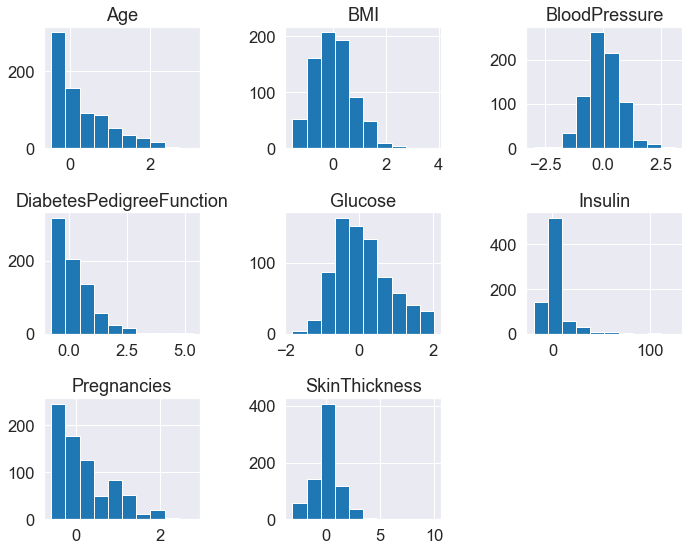

In [24]:
X_scaled.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

We can see that the scales are much more aligned than before. We will proceed to use these scaled features in our models.

### Baseline Accuracy

The **null accuracy** is the accuracy that we could achieve by always predicting the most frequent class. We can use *value_counts* to check the frequency of our target classes.

In [25]:
y.value_counts(normalize=True) #naive rule

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In other words, our final model should *at least* surpass 65% accuracy to be considered a successful model. Otherwise, we could have performed better classification by simply predicting 0 (no diabetes) for every instance in our data set. Think of this as a minimum baseline of accuracy.

Now we split our data into a training set and a validation set for model evaluation.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.25, random_state=1, stratify=y) 

We import some model evaluation functions we will soon need.

In [28]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import classification_report, confusion_matrix

Now, let's finally build our first model!

### K-Nearest Neighbor

The principle behind nearest neighbor methods for classification is to find a predefined number of training samples, K, closest in distance to the new point, and predict the label from these based on a majority vote.

For a more in-depth look at KNN consult the documentation at [Scikit-Learn's Nearest Neighbors Overview](https://scikit-learn.org/stable/modules/neighbors.html).

In [29]:
from sklearn.neighbors import KNeighborsClassifier

#### Train/Test Split

As K (the number of neighbors) increases, our model's complexity decreases and our model may underfit. Converseley, lower values of K increase model complexity, and we should be aware of potential overfitting. We write a for loop to iterate over different values of K to find the optimal number of neighbors.

In [30]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(metrics.accuracy_score(y_val, y_pred))

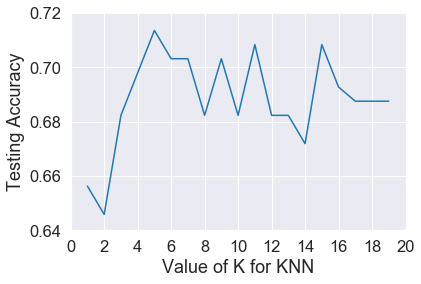

In [31]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0.64, 0.73, 0.02))
plt.show()

We see that the testing accuracy does not smoothly change with the value of K. We have somewhat large swings in accuracy, and we can see that even number values of K consistently drop the accuracy. This is likely because ties in the voting can occur when K is an even number, and there is not an optimal way of breaking such ties.

We follow up using k-fold cross validation, which will provide a more consistent estimate of our models performance.

#### K-Fold Cross Validation

This evaluation technique allows us to use each observation in our data set in both the training set and validation set. It is equivalent to performing the train/test split 'k' times and averaging the testing accuracies. This results in a more robust estimate of our testing accuracy and protects against overfitting the training set. This method provides us some reassurance that the parameter estimates are not unique to the data we used to estimate them, so we feel more confident in how our model will perform on out-of-sample data.

For a further explanation see [A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/).

We can once again search for the optimal value of K in our KNN model. This time we use 10-fold cross validation inside the for loop.

In [32]:
k_range2 = range(1, 25)
knn_cv_loop_scores = []
knn_cv_loop_std = []
for k in k_range2:
    knn_cv_loop = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv_loop, X_scaled, y, cv=10, scoring='accuracy')
    knn_cv_loop_scores.append(scores.mean())
    knn_cv_loop_std.append(scores.std())

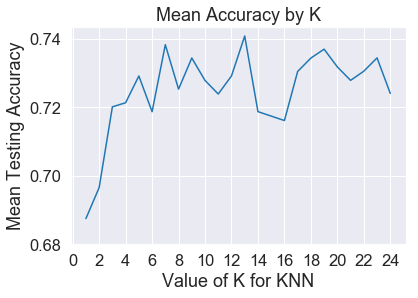

In [33]:
plt.plot(k_range2, knn_cv_loop_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Testing Accuracy')
plt.yticks(np.arange(0.68, 0.76, 0.02))
plt.xticks(np.arange(0, 26, 2))
plt.title("Mean Accuracy by K")
plt.show()

This estimate is closer to how our model will truly perform than the single train / test split accuracy. Additionally, because we have an accuracy score for each of the 10 folds, we can compute a precision estimate (standard deviation) for our scores. Note that the max score occurs when K=13, with K=7 being quite close behind.

From here on we evaluate using K-Fold Cross Validation instead of the single train/test split. With a data set of our size, K-Fold CV is not computationally expensive, and gives us a more reliable estimate of out-of-sample performance.

Let's refit the KNN model with K=13 and check our performance metrics.

In [34]:
knn_13 = KNeighborsClassifier(n_neighbors=13)
knn_13_scores_acc = cross_val_score(knn_13, X_scaled, y, cv=10, scoring='accuracy')
print('Accuracy:', knn_13_scores_acc.mean())
print('Std:', knn_13_scores_acc.std())

Accuracy: 0.7407894736842104
Std: 0.03948784414310936


In [35]:
knn_13_scores_roc = cross_val_score(knn_13, X_scaled, y, cv=10, scoring='roc_auc')
print('Area Under ROC:', knn_13_scores_roc.mean())
print('Std:', knn_13_scores_roc.std())

Area Under ROC: 0.7816994301994302
Std: 0.03557539718785982


In [36]:
knn_13_scores_f1 = cross_val_score(knn_13, X_scaled, y, cv=10, scoring='f1')
print('F1 Score:', knn_13_scores_f1.mean())
print('Std:', knn_13_scores_f1.std())

F1 Score: 0.5964550781820435
Std: 0.0644259407694322


### Logistic Regression

If you need a brief introduction for what goes on under the hood with this model see [Logistic Regression for Machine Learning](https://machinelearningmastery.com/logistic-regression-for-machine-learning/).

In [37]:
from sklearn.linear_model import LogisticRegression

Out of curiosity let's try logistic regression with the unscaled features first. Then we can see if our results actually improve from our feature scaling.

In [38]:
logreg = LogisticRegression()
log_scores_acc = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print('Accuracy:', log_scores_acc.mean())
print('Std:', log_scores_acc.std())

Accuracy: 0.7643711551606287
Std: 0.04232947900359334


In [39]:
log_scores_roc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('Area Under ROC:', log_scores_roc.mean())
print('Std:', log_scores_roc.std())

Area Under ROC: 0.8288632478632479
Std: 0.036208399545695644


In [40]:
log_scores_f1 = cross_val_score(logreg, X, y, cv=10, scoring='f1')
print('F1 Score:', log_scores_f1.mean())
print('Std:', log_scores_f1.std())

F1 Score: 0.6170704181280778
Std: 0.06240392379742484


### Logistic Regression with scaled data

In [41]:
log_scores_acc = cross_val_score(logreg, X_scaled, y, cv=10, scoring='accuracy')
print('Accuracy:', log_scores_acc.mean())
print('Std:', log_scores_acc.std())

Accuracy: 0.7695317840054683
Std: 0.03413223827875861


In [42]:
log_scores_roc = cross_val_score(logreg, X_scaled, y, cv=10, scoring='roc_auc')
print('Area Under ROC:', log_scores_roc.mean())
print('Std:', log_scores_roc.std())

Area Under ROC: 0.8371481481481482
Std: 0.0375951083538997


In [43]:
log_scores_f1 = cross_val_score(logreg, X_scaled, y, cv=10, scoring='f1')
print('F1 Score:', log_scores_f1.mean())
print('Std:', log_scores_f1.std())

F1 Score: 0.6288253074279357
Std: 0.05184220630626809


Accuracy, AUC, and F1 score all improved marginally with the scaled features. The amount that feature scaling improves your modeling performance simply depends on the data set.

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree = DecisionTreeClassifier(random_state=42)
tree_scores_acc = cross_val_score(tree, X_scaled, y, cv=10, scoring='accuracy')
print('Accuracy:', tree_scores_acc.mean())
print('Std:', tree_scores_acc.std())

Accuracy: 0.6836807928913192
Std: 0.05196954543751818


In [46]:
tree_scores_roc = cross_val_score(tree, X_scaled, y, cv=10, scoring='roc_auc')
print('Area Under ROC:', tree_scores_roc.mean())
print('Std:', tree_scores_roc.std())

Area Under ROC: 0.6480284900284901
Std: 0.05829784260682349


In [47]:
tree_scores_f1 = cross_val_score(tree, X_scaled, y, cv=10, scoring='f1')
print('F1 Score:', tree_scores_f1.mean())
print('Std:', tree_scores_f1.std())

F1 Score: 0.5362907814779391
Std: 0.08319590241745463


Our decision tree is likely overfitting quite heavily, which can be seen by a much lower testing accuracy than the previous models. This can be overcome with some hyperparameter tuning, but the random forest model we fit below is known for limiting overfitting by using an ensemble (collection) of decision trees and aggregating their results.

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\cproe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [49]:
forest = RandomForestClassifier(random_state=42)
forest_scores_acc = cross_val_score(forest, X_scaled, y, cv=10, scoring='accuracy')
print('Accuracy:', forest_scores_acc.mean())
print('Std:', forest_scores_acc.std())

Accuracy: 0.7461038961038963
Std: 0.055709169718803186


In [50]:
forest_scores_roc = cross_val_score(forest, X_scaled, y, cv=10, scoring='roc_auc')
print('Area Under ROC:', forest_scores_roc.mean())
print('Std:', forest_scores_roc.std())

Area Under ROC: 0.7909088319088319
Std: 0.05262053109628184


In [51]:
forest_scores_f1 = cross_val_score(forest, X_scaled, y, cv=10, scoring='f1')
print('F1 Score:', forest_scores_f1.mean())
print('Std:', forest_scores_f1.std())

F1 Score: 0.5831500043907996
Std: 0.09218277397600116


The random forest model performs much better than the decision tree. It's ensemble of trees allows it to generalize to the validation set better, even with just the default parameters.

### Support Vector Machine

In [52]:
from sklearn.svm import SVC

In [53]:
svm = SVC(kernel='linear')
svm_scores_acc = cross_val_score(svm, X_scaled, y, cv=10, scoring='accuracy')
print('Accuracy:', svm_scores_acc.mean())
print('Std:', svm_scores_acc.std())

Accuracy: 0.7656356801093643
Std: 0.03240859221828781


In [54]:
svm_scores_auc = cross_val_score(svm, X_scaled, y, cv=10, scoring='roc_auc')
print('Area Under ROC:', svm_scores_auc.mean())
print('Std:', svm_scores_auc.std())

Area Under ROC: 0.8374245014245014
Std: 0.039727569195997584


In [55]:
svm_scores_f1 = cross_val_score(svm, X_scaled, y, cv=10, scoring='f1')
print('F1 Score:', svm_scores_f1.mean())
print('Std:', svm_scores_f1.std())

F1 Score: 0.6175193483667119
Std: 0.05702135439942457


## Fine-Tuning Models with GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

We previously fitted our models using the defaults of scikit-learn. Performance can potentially be improved by tuning some hyperparameters. Rather than manually trying different hyperparameter settings until we find a good combination, we can look to scikit-learn's GridSearchCV to automate the process.

GridSearchCV tries all combinations of the hyperparameters we pass it, and can even evaluate these combinations using K-Fold Cross Validation.

#### Which models to fine tune?

We already tuned our KNN model when selecting the optimal K, so there is no need to tune it further. 

Logistic Regression in scikit-learn uses regularization techniques to help prevent overfitting and improve generalization to unseen data, so we can fine tune some of its parameters such as the type of regularization used and the strength of the regularization penalty. For brief overview on regularization techniques see [Regularization in Machine Learning](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a).

Decision trees will generally be outperformed by random forests for prediction purposes. Therefore, we will only further tune the random forest model.

### Logistic Regression Tuning

Remember that we use paramter C as our regularization parameter. 

Parameter C = 1/λ.

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.


Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we lower the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

In [57]:
param_grid_logreg = {
    'penalty': ['l1', 'l2'], 
    'C': [.01,0.1,1,10,100]
}

In [58]:
scoring = ['accuracy', 'roc_auc', 'f1']

In [59]:
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=10, scoring=scoring, refit='roc_auc')

In [60]:
grid_search_logreg.fit(X_scaled, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score='warn',
       scoring=['accuracy', 'roc_auc', 'f1'], verbose=0)

Check the best parameter combination by calling the *best_params* attribute of our GridSearch object.

In [61]:
grid_search_logreg.best_params_

{'C': 1, 'penalty': 'l1'}

We find that the default parameter values of 1 for __C__ and the default value 'L1' for regularization **penalty** type maximizes our scoring metric, which in this case is Area Under ROC.

Not that the default value for **C** is 1.0. Thus, our GridSearch found a better performing model with a higher regularization strength than the default.

Let's check the scores of this fine-tuned logistic regression estimator.

In [62]:
print('Best Accuracy:', grid_search_logreg.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', grid_search_logreg.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', grid_search_logreg.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.7721354166666666
Best ROC: 0.8373449370845204
Best F1 Score: 0.6311906273680971


While these scores are higher, the difference is negligible. However, it is good practice using GridSearch techniques to automatically tune hyperparameters.

We can access the best estimator directly using the *best_estimator_* attribute. This will be useful later when we predict on our holdout set.

In [63]:
logreg_tuned = grid_search_logreg.best_estimator_

### Support Vector Machine Tuning

In our baseline model we used an SVM with a linear kernel. We can experiment with polynomial ('poly') and radial basis ('rbf') kernel functions to support more complex nonlinear relationships. 

- Our linear kernel can be further tuned with the regularization parameter _**C**_. <br>
- We tune the polynomial kernel with _**degree**_ (degree of polynomial), _**C**_, and _**coef0**_ which controls how much the model is influenced by high-degree polynomials versus low-degree polynomials. <br>
- We tune the rbf kernel using _**C**_ and _**gamma**_ which defines how far the influence of a single training example reaches.

For further reading on the effects of _**C**_ and _**gamma**_ in the radial basis kernel see [RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

#### Linear Kernel Tuning

In [64]:
param_grid_linear_svm = {
    'kernel': ['linear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

In [65]:
grid_search_linear_svm = GridSearchCV(svm, param_grid_linear_svm, scoring=scoring, refit='roc_auc')

In [66]:
grid_search_linear_svm.fit(X_scaled, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score='warn',
       scoring=['accuracy', 'roc_auc', 'f1'], verbose=0)

In [67]:
grid_search_linear_svm.best_params_

{'C': 100, 'kernel': 'linear'}

In [68]:
print('Best Accuracy:', grid_search_linear_svm.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', grid_search_linear_svm.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', grid_search_linear_svm.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.7643229166666666
Best ROC: 0.8367709358519247
Best F1 Score: 0.612543020935158


#### Polynomial Kernel Tuning

In [69]:
param_grid_poly_svm = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10, 100],
    'degree': [1, 2],
}

In [70]:
grid_search_poly_svm = GridSearchCV(svm, param_grid_poly_svm, cv=3, scoring=scoring, refit='roc_auc')

In [71]:
warnings.filterwarnings('ignore')
grid_search_poly_svm.fit(X_scaled, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [1, 2]},
       pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score='warn',
       scoring=['accuracy', 'roc_auc', 'f1'], verbose=0)

In [72]:
grid_search_poly_svm.best_params_

{'C': 10, 'degree': 1, 'kernel': 'poly'}

In [73]:
print('Best Accuracy:', grid_search_poly_svm.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', grid_search_poly_svm.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', grid_search_poly_svm.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.76953125
Best ROC: 0.8366383858549202
Best F1 Score: 0.6120175733884158


#### Radial Basis Kernel Tuning

In [74]:
param_grid_rbf_svm = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0, 0.1, 1, 10, 100],
}

In [75]:
grid_search_rbf_svm = GridSearchCV(svm, param_grid_rbf_svm, scoring=scoring, refit='roc_auc')

In [76]:
grid_search_rbf_svm.fit(X_scaled, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit='roc_auc', return_train_score='warn',
       scoring=['accuracy', 'roc_auc', 'f1'], verbose=0)

In [77]:
grid_search_rbf_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [78]:
print('Best Accuracy:', grid_search_rbf_svm.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', grid_search_rbf_svm.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', grid_search_rbf_svm.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.7356770833333334
Best ROC: 0.7922439606165979
Best F1 Score: 0.5641881423227978


### Random Forest Tuning

Here are some of the important hyperparameters to tune for a randome forest:
- n_estimators = number of trees in the foreset <br>
- max_features = max number of features considered for splitting a node <br>
- max_depth = max number of levels in each decision tree <br>
- min_samples_split = min number of data points placed in a node before the node is split <br>
- min_samples_leaf = min number of data points allowed in a leaf node <br>
- bootstrap = method for sampling data points (with or without replacement) <br>
- criterion = function to measure the quality of a split ('gini' or 'entropy')

Previously we only tuned 2 hyperparameters, so GridSearchCV worked fine. Here we have many more hyperparameters to tune, which can quickly become computationally difficult. The solution is to use RandomizedSearchCV.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(1, 45, num = 3)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [5, 10]    
}

In [81]:
random_search_rf = RandomizedSearchCV(forest, param_grid_rf, cv=10, n_iter=100, scoring=scoring, 
                                      refit='roc_auc', random_state=42)

In [82]:
random_search_rf.fit(X_scaled, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 23, 45], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit='roc_auc',
          return_train_score='warn', scoring=['accuracy', 'roc_auc', 'f1'],
          verbose=0)

In [83]:
random_search_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 23,
 'criterion': 'entropy'}

In [84]:
print('Best Accuracy:', random_search_rf.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', random_search_rf.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', random_search_rf.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.77734375
Best ROC: 0.8431563093542261
Best F1 Score: 0.6560375870080736


Again we save the best estimator.

In [85]:
rf_tuned = random_search_rf.best_estimator_

A useful characteristic of random forests in scikit-learn is the *feature_importances_* attribute. This attribute gives information on which input features most effectively help distinguish between the target classes. While our purpose is prediction over interpretability, this is free information for the taking. This can be useful for future feature selection, as well as general insight into the relationships between our features and target.

By default the *feature_importances* attribute prints an array of the importance values. We want to match these numerical values to their relevant features, and we do so with the following code.

In [86]:
feature_importances = pd.DataFrame(rf_tuned.feature_importances_, index = X_scaled.columns, 
                                   columns=['Importance']).sort_values('Importance',ascending=False)
feature_importances

,Importance
Glucose,0.292594
BMI,0.179979
Age,0.136659
DiabetesPedigreeFunction,0.109296
Insulin,0.083519
Pregnancies,0.068431
BloodPressure,0.065894
SkinThickness,0.063628


We saw earlier in our pair plot diagonal that **Glucose** appeared to create the largest distinction among the target classes in **Outcome**. These results are in line with our expectations. BMI is the second most useful feature for the random forest. This makes sense as well, as the risk of diabetes rises with increasing body weight. 

## Model Selection

Remember that our goal is prediction over interpretabilty and we evaluate this prediction power using Area Under ROC and F1 score. We also look at accuracy, but as mentioned previously this can be misleading so it will not be our primary decision metric. All of these metrics are on the interval [0, 1] with 1 being a perfect score.

Let's look at our highest performing models and make a selection.

__Tuned Logistic Regression:__

In [87]:
print('Best Accuracy:', grid_search_logreg.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', grid_search_logreg.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', grid_search_logreg.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.7721354166666666
Best ROC: 0.8373449370845204
Best F1 Score: 0.6311906273680971


__Tuned SVM with linear kernel__:

In [88]:
print('Best Accuracy:', grid_search_linear_svm.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', grid_search_linear_svm.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', grid_search_linear_svm.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.7643229166666666
Best ROC: 0.8367709358519247
Best F1 Score: 0.612543020935158


__Tuned Random Forest__:

In [89]:
print('Best Accuracy:', random_search_rf.cv_results_['mean_test_accuracy'].max())
print('Best ROC:', random_search_rf.cv_results_['mean_test_roc_auc'].max())
print('Best F1 Score:', random_search_rf.cv_results_['mean_test_f1'].max())

Best Accuracy: 0.77734375
Best ROC: 0.8431563093542261
Best F1 Score: 0.6560375870080736


The fine-tuned random forest model performs the best across all three evaluation metrics we considered. This suggests that the random forest model will generalize the best on unseen data. Additionally, we can gain some insight into the relationships between the feature variables and target variable by the *variable importance* method discussed earlier. While our stated primary goal here is predictive accuracy, when models are extremely close in predictive power we can think of how much interpretability and insight they give us as a "tie breaker" of sorts.

Ultimately, your particular needs and goals will dictate how you choose which model to move forward with. In this project the random forest model is our choice.

## Improvements

In this section I will add some ideas to improve upon the above analysis. This is a good opportuntiy to look over your work as a whole and consider what can be done to make it even stronger. Some ideas simply may not have been feasible in the original analysis given time constraints, while others may have been out of your skill set at the time. This list is not all encompassing, so feel free to explore further improvements.

#### Ensemble Methods

An individual classifier can be subject to certain biases. One way around this is by combining multiple diverse classifiers to predict new instances. For classification, simply predict the target of a new instance by a majority vote of the individual classifiers. This is called *hard voting*. When your classifiers can predict a probability of a class instead of just a class, a weighted vote known as *soft voting* can be used. This ensures that classifiers who are more sure of their prediction receive more weight in the vote. Ensemble methods can decrease variance and bias, and often increase accuracy.

In fact, the random forest algorithm we chose as our final model is an ensemble of decision trees! We could take this a step further by combining our logistic regression, support vector machine, and random forest models into a single ensemble classifier.

For more info see: [Ensemble Learning in Machine Learning | Getting Started](https://towardsdatascience.com/ensemble-learning-in-machine-learning-getting-started-4ed85eb38e00)

#### Feature Engineering

Feature engineering is the process of creating features that don't already exist in the dataset. 

For example:
-  Breaking a datetime feature into just an hour feature.
-  Transforming longitudes/latitudes into cities or other areas of interest. 
-  Creating *interaction terms* which can be products, sums, or differences of two or more existing features.

For more info see: [How to create useful features for Machine Learning](https://www.dataschool.io/introduction-to-feature-engineering/)



#### Unsupervised Learning

Supervised learning is the class of machine learning that uses input data (our feature matrix) and labels (target variable). In our case the **Outcome** column was labeled 0/1 for no diabetes/diabetes. Unsupervised learning algorithms take input data without labels and attempt to discover underlying structures in the data.

The most common type of unsupervised learning is clustering. The aim is to segregate groups with similar traits and assign them into clusters. The goal of clustering is to determine the internal grouping in a set of unlabeled data, and is often used for data exploration and visualization. 

Because there is no definitive target with which to check results, this process can be more of an art than a science.

For more info see: [Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03) &
[Unsupervised Learning and Data Clustering](https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a)